**Description:** This notebook demonstrates how to do timeseries classification using RNN models (Simple RNN, LSTM, and GRU).

Reference: https://www.kaggle.com/code/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru/notebook

## Load the dataset

In [ ]:
import pandas as pd
import requests
from io import StringIO
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# combined data
# load processed data
train_mean = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_mean_mode.csv')
train_latest = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_latest.csv')
train_dispers = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_entropy_std.csv')
train_min = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_min.csv')
train_max = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_max.csv')
train_q1 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_q1.csv')
train_q3 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_q3.csv')
train_kurtosis = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_kurtosis.csv')
train_skewness = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_skewness.csv')
train_range = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_range.csv')
train_iqr = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_iqr.csv')
train_latest = train_latest.drop(train_latest.columns[0:13], axis=1)
train_dispers = train_dispers.drop(train_dispers.columns[0:13], axis=1)
train_min = train_min.drop(train_min.columns[0:13], axis=1)
train_max = train_max.drop(train_max.columns[0:13], axis=1)
train_q1 = train_q1.drop(train_q1.columns[0:13], axis=1)
train_q3 = train_q3.drop(train_q3.columns[0:13], axis=1)
train_kurtois = train_kurtosis.drop(train_kurtosis.columns[0:13], axis=1)
train_skewness = train_skewness.drop(train_skewness.columns[0:13], axis=1)
train_range = train_range.drop(train_range.columns[0:13], axis=1)
train_iqr = train_iqr.drop(train_iqr.columns[0:13], axis=1)

# merge train_ and train_latest
train = pd.concat([train_mean, train_latest, train_dispers, train_min, train_max], axis=1)

# load processed data
test_mean = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_mean_mode.csv')
test_latest = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_latest.csv')
test_dispers = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_entropy_std.csv')
test_min = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_min.csv')
test_max = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_max.csv')
test_q1 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_q1.csv')
test_q3 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_q3.csv')
test_kurtosis = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_kurtosis.csv')
test_skewness = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_skewness.csv')
test_range = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_range.csv')
test_iqr = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_iqr.csv')
test_latest = test_latest.drop(test_latest.columns[0:12], axis=1)
test_dispers = test_dispers.drop(test_dispers.columns[0:12], axis=1)
test_min = test_min.drop(test_min.columns[0:12], axis=1)
test_max = test_max.drop(test_max.columns[0:12], axis=1)
test_q1 = test_q1.drop(test_q1.columns[0:12], axis=1)
test_q3 = test_q3.drop(test_q3.columns[0:12], axis=1)
test_kurtosis = test_kurtosis.drop(test_kurtosis.columns[0:12], axis=1)
test_skewness = test_skewness.drop(test_skewness.columns[0:12], axis=1)
test_range = test_range.drop(test_range.columns[0:12], axis=1)
test_iqr = test_iqr.drop(test_iqr.columns[0:12], axis=1)

# merge train_mean and train_latest
test = pd.concat([test_mean, test_latest, test_dispers, test_min, test_max], axis=1)

In [ ]:
train = train.drop(train.columns[11], axis=1)
test = test.drop(test.columns[11], axis=1)

In [ ]:
x_train = pd.concat([train.iloc[:,10], train.iloc[:,12:]], axis=1)
y_train = train.iloc[:,11]

!wget https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/code_base/adjust_imbl.py
from adjust_imbl import adjust_imbl
x_train, y_train = adjust_imbl(x_train, y_train)

# with 80% of the data for training and 20% for validation
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=3612)

x_test = test.iloc[:,10:]

--2023-12-05 04:22:28--  https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/code_base/adjust_imbl.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 927 [text/plain]
Saving to: ‘adjust_imbl.py’

adjust_imbl.py      100%[===================>]     927  --.-KB/s    in 0s      

2023-12-05 04:22:28 (38.0 MB/s) - ‘adjust_imbl.py’ saved [927/927]

Original dataset shape Counter({0: 9564, 1: 2032})
Resampled dataset shape Counter({0: 2032, 1: 2032})


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=150)  # You can specify the number of components to reduce to
scaler = StandardScaler()

# Fit and transform the scaler on the training data
x_train_scaled = scaler.fit_transform(x_train)

# Fit PCA on the scaled training data
pca.fit(x_train_scaled)

# Transform the training, validation, and test data using the fitted PCA and scaler
x_train = pca.transform(x_train_scaled)
x_valid_scaled = scaler.transform(x_valid)
x_valid = pca.transform(x_valid_scaled)
x_test_scaled = scaler.transform(x_test)
x_test = pca.transform(x_test_scaled)

In [ ]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_valid = x_valid.reshape((x_valid.shape[0], x_valid.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Reset the index of the y_train DataFrame
y_train = y_train.reset_index(drop=True)

# Shuffle the indices
idx = np.random.permutation(len(x_train))

# Reassign the values using the shuffled indices
x_train = x_train[idx]
y_train = y_train.iloc[idx]

## Build the model

The model processes a tensor of shape `(batch size, sequence length, features)`,
where `sequence length` is the number of time steps and `features` is each input
timeseries.


In [ ]:
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM, GRU, SimpleRNN
from keras.models import Sequential
import keras

# Simple RNN

In [ ]:
# In Keras, the "RNN" layer is a wrapper for the RNN cell, not the actual cell itself.
# specify the type of RNN cell to use, such as LSTM, GRU, or SimpleRNN

model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(100, return_sequences=False, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=["accuracy"])

print ('model compiled')

callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

print (model.summary())

#Train the model
history_RNN=model.fit(x_train, y_train, batch_size=512, epochs=200, validation_data = (x_valid, y_valid), callbacks=callbacks)

model compiled
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 150, 50)           2600      
                                                                 
 dropout (Dropout)           (None, 150, 50)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100)               15100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 17801 (69.54 KB)
Trainable params: 17801 (69.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


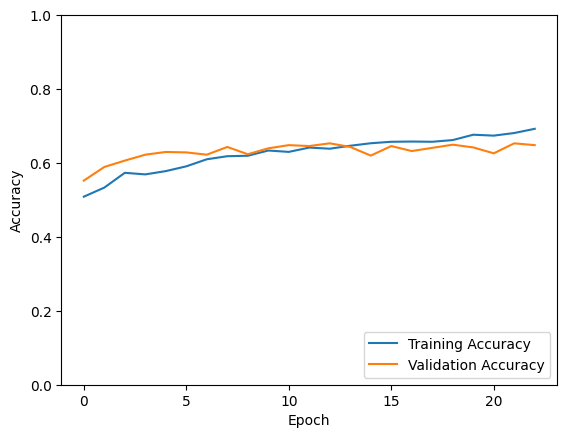

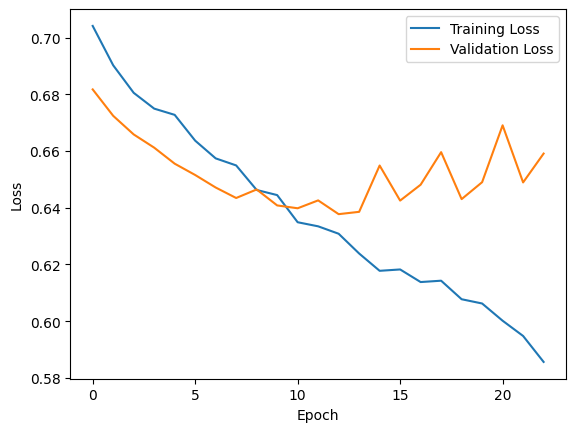

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over epochs
plt.plot(history_RNN.history['accuracy'], label='Training Accuracy')
plt.plot(history_RNN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history_RNN.history['loss'], label='Training Loss')
plt.plot(history_RNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


##Evaluation

In [ ]:
from sklearn.metrics import roc_auc_score

threshold = 0.5

y_train_pred = model.predict(x_train)
# Convert probabilities to binary predictions
y_train_pred_binary = (y_train_pred > threshold).astype(int)
y_valid_pred = model.predict(x_valid)
y_valid_pred_binary = (y_valid_pred > threshold).astype(int)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
accuracy_train = accuracy_score(y_train, y_train_pred_binary)
auc_train = roc_auc_score(y_train, y_train_pred)

accuracy_valid = accuracy_score(y_valid, y_valid_pred_binary)
auc_valid = roc_auc_score(y_valid, y_valid_pred)

print(f'Accuracy (train): {accuracy_train:.4f}')
print(f'AUC (train): {auc_train:.4f}')

print(f'Accuracy (valid): {accuracy_valid:.4f}')
print(f'AUC (valid): {auc_valid:.4f}')

26/26 [==============================] - 1s 22ms/step
Accuracy (train): 0.6724
AUC (train): 0.7338
Accuracy (valid): 0.6531
AUC (valid): 0.6989


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision, recall, and F1 score
precision = precision_score(y_train, y_train_pred_binary, zero_division=1)
recall = recall_score(y_train, y_train_pred_binary, zero_division=1)
f1 = f1_score(y_train, y_train_pred_binary, zero_division=1)

# Print with 4 digits limit
print("For training set:")
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4),"\n")

# Calculate precision, recall, and F1 score
precision = precision_score(y_valid, y_valid_pred_binary, zero_division=1)
recall = recall_score(y_valid, y_valid_pred_binary, zero_division=1)
f1 = f1_score(y_valid, y_valid_pred_binary, zero_division=1)

# Print with 4 digits limit
print("For validation set:")
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))

For training set:
Precision: 0.7046
Recall: 0.5961
F1 Score: 0.6458 

For validation set:
Precision: 0.6555
Recall: 0.6328
F1 Score: 0.6439


In [ ]:
y_test_pred = model.predict(x_test)
y_test_pred_binary = (y_test_pred > threshold).astype(int)

92/92 [==============================] - 3s 36ms/step


## Export

In [ ]:
# Assuming y_test_pred_binary is a numpy array
predictions_df = pd.DataFrame(y_test_pred, columns=['readmitted_within_30days'])
merged_df = test[['id']].merge(predictions_df, left_index=True, right_index=True)
merged_df.to_csv('RNN_Pred.csv', index=False)

from google.colab import files
files.download('RNN_Pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# LSTM

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(100, return_sequences=False, activation="relu"))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(1, activation="sigmoid"))

model_LSTM.compile(loss='binary_crossentropy', optimizer='Adam', metrics=["accuracy"])

print ('model compiled')

callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

print (model_LSTM.summary())

#Train the model
history_LSTM=model_LSTM.fit(x_train, y_train, batch_size=512, epochs=200, validation_data = (x_valid, y_valid), callbacks=callbacks)

model compiled
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 50)           10400     
                                                                 
 dropout_2 (Dropout)         (None, 150, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 70901 (276.96 KB)
Trainable params: 70901 (276.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
N

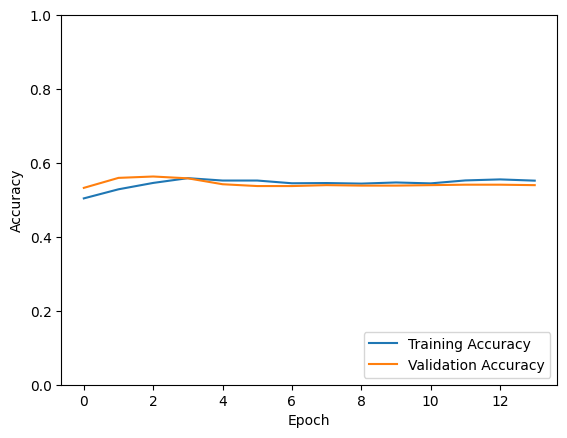

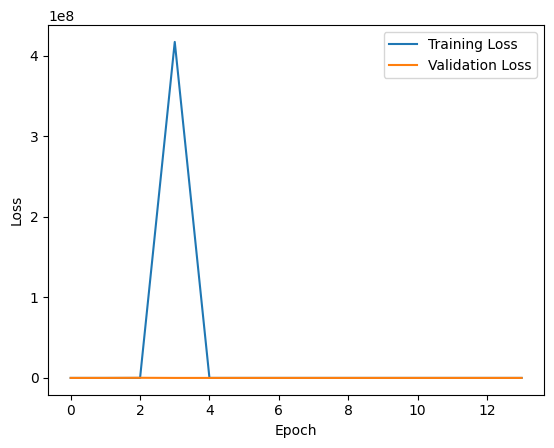

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over epochs
plt.plot(history_LSTM.history['accuracy'], label='Training Accuracy')
plt.plot(history_LSTM.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history_LSTM.history['loss'], label='Training Loss')
plt.plot(history_LSTM.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


##Evaluation

In [ ]:
from sklearn.metrics import roc_auc_score

threshold = 0.5

y_train_pred = model_LSTM.predict(x_train)
# Convert probabilities to binary predictions
y_train_pred_binary = (y_train_pred > threshold).astype(int)
y_valid_pred = model_LSTM.predict(x_valid)
y_valid_pred_binary = (y_valid_pred > threshold).astype(int)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
accuracy_train = accuracy_score(y_train, y_train_pred_binary)
auc_train = roc_auc_score(y_train, y_train_pred)

accuracy_valid = accuracy_score(y_valid, y_valid_pred_binary)
auc_valid = roc_auc_score(y_valid, y_valid_pred)

print(f'Accuracy (train): {accuracy_train:.4f}')
print(f'AUC (train): {auc_train:.4f}')

print(f'Accuracy (valid): {accuracy_valid:.4f}')
print(f'AUC (valid): {auc_valid:.4f}')

26/26 [==============================] - 2s 55ms/step
Accuracy (train): 0.5611
AUC (train): 0.5880
Accuracy (valid): 0.5584
AUC (valid): 0.5890


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision, recall, and F1 score
precision = precision_score(y_train, y_train_pred_binary, zero_division=1)
recall = recall_score(y_train, y_train_pred_binary, zero_division=1)
f1 = f1_score(y_train, y_train_pred_binary, zero_division=1)

# Print with 4 digits limit
print("For training set:")
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4),"\n")

# Calculate precision, recall, and F1 score
precision = precision_score(y_valid, y_valid_pred_binary, zero_division=1)
recall = recall_score(y_valid, y_valid_pred_binary, zero_division=1)
f1 = f1_score(y_valid, y_valid_pred_binary, zero_division=1)

# Print with 4 digits limit
print("For validation set:")
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))

For training set:
Precision: 0.5816
Recall: 0.442
F1 Score: 0.5023 

For validation set:
Precision: 0.5611
Recall: 0.5012
F1 Score: 0.5295


In [ ]:
y_test_pred = model_LSTM.predict(x_test)
y_test_pred_binary = (y_test_pred > threshold).astype(int)

92/92 [==============================] - 2s 24ms/step


## Export

In [ ]:
predictions_df = pd.DataFrame(y_test_pred, columns=['readmitted_within_30days'])
merged_df = test[['id']].merge(predictions_df, left_index=True, right_index=True)
merged_df.to_csv('LSTM_Pred.csv', index=False)

from google.colab import files
files.download('LSTM_Pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# GRU

In [ ]:
model_GRU = Sequential()
model_GRU.add(GRU(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model_GRU.add(Dropout(0.2))
model_GRU.add(GRU(64, return_sequences=False, activation='relu'))
model_GRU.add(Dropout(0.2))
model_GRU.add(Dense(1, activation = "sigmoid"))

model_GRU.compile(loss='binary_crossentropy', optimizer='Adam', metrics=["accuracy"])

print('model compiled')

callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

print(model_GRU.summary())

#Train the model
history_GRU=model_GRU.fit(x_train, y_train, batch_size=512, epochs=200, validation_data = (x_valid, y_valid), callbacks=callbacks)

model compiled
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 150, 50)           7950      
                                                                 
 dropout_4 (Dropout)         (None, 150, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                22272     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 30287 (118.31 KB)
Trainable params: 30287 (118.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
N

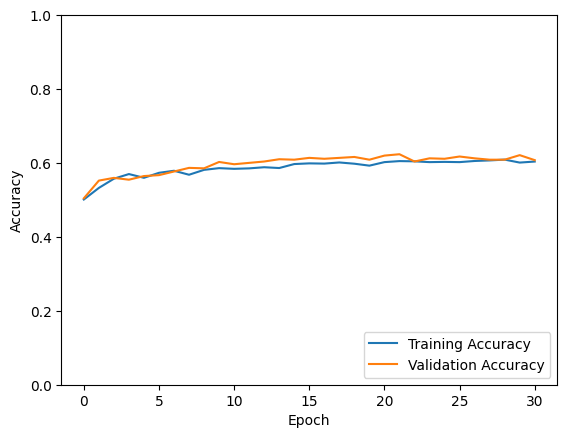

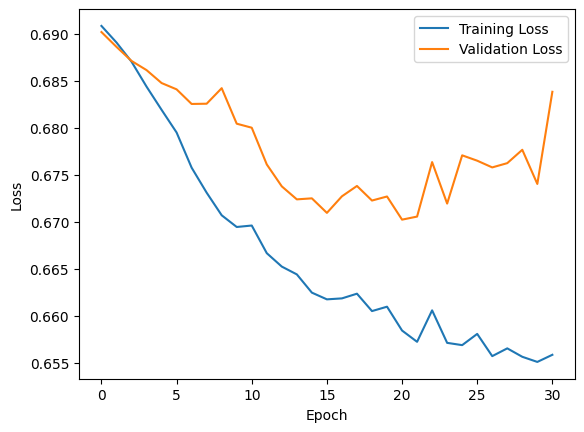

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over epochs
plt.plot(history_GRU.history['accuracy'], label='Training Accuracy')
plt.plot(history_GRU.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history_GRU.history['loss'], label='Training Loss')
plt.plot(history_GRU.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

##Evaluation

In [ ]:
from sklearn.metrics import roc_auc_score

threshold = 0.5

y_train_pred = model_GRU.predict(x_train)
# Convert probabilities to binary predictions
y_train_pred_binary = (y_train_pred > threshold).astype(int)
y_valid_pred = model_GRU.predict(x_valid)
y_valid_pred_binary = (y_valid_pred > threshold).astype(int)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
accuracy_train = accuracy_score(y_train, y_train_pred_binary)
auc_train = roc_auc_score(y_train, y_train_pred)

accuracy_valid = accuracy_score(y_valid, y_valid_pred_binary)
auc_valid = roc_auc_score(y_valid, y_valid_pred)

print(f'Accuracy (train): {accuracy_train:.4f}')
print(f'AUC (train): {auc_train:.4f}')

print(f'Accuracy (valid): {accuracy_valid:.4f}')
print(f'AUC (valid): {auc_valid:.4f}')

26/26 [==============================] - 1s 28ms/step
Accuracy (train): 0.6050
AUC (train): 0.6492
Accuracy (valid): 0.6199
AUC (valid): 0.6501


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision, recall, and F1 score
precision = precision_score(y_train, y_train_pred_binary, zero_division=1)
recall = recall_score(y_train, y_train_pred_binary, zero_division=1)
f1 = f1_score(y_train, y_train_pred_binary, zero_division=1)

# Print with 4 digits limit
print("For training set:")
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4),"\n")

# Calculate precision, recall, and F1 score
precision = precision_score(y_valid, y_valid_pred_binary, zero_division=1)
recall = recall_score(y_valid, y_valid_pred_binary, zero_division=1)
f1 = f1_score(y_valid, y_valid_pred_binary, zero_division=1)

# Print with 4 digits limit
print("For validation set:")
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))

For training set:
Precision: 0.6383
Recall: 0.4886
F1 Score: 0.5535 

For validation set:
Precision: 0.6277
Recall: 0.5732
F1 Score: 0.5992


In [ ]:
y_test_pred = model_GRU.predict(x_test)
y_test_pred_binary = (y_test_pred > threshold).astype(int)

92/92 [==============================] - 5s 52ms/step


## Export

In [ ]:
# Assuming y_test_pred_binary is a numpy array
predictions_df = pd.DataFrame(y_test_pred, columns=['readmitted_within_30days'])
merged_df = test[['id']].merge(predictions_df, left_index=True, right_index=True)
merged_df.to_csv('GRU_Pred.csv', index=False)

from google.colab import files
files.download('GRU_Pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>